   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Silhouette Score for K-Means: 0.10748341284067853


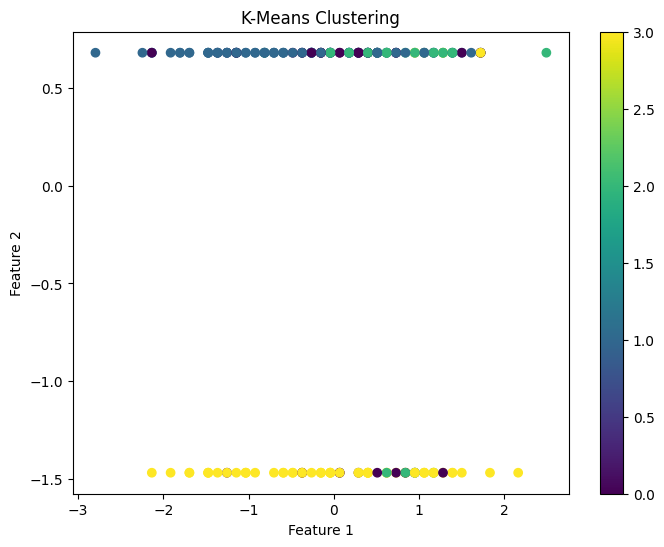

Silhouette Score for GMM: 0.09592032808986682


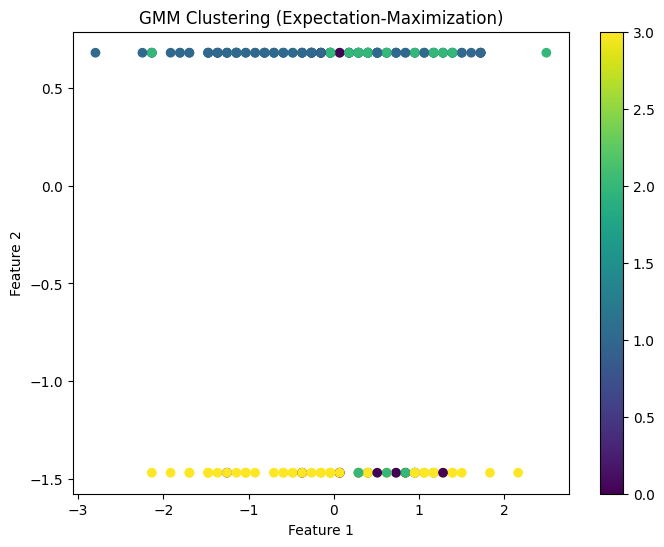


Comparison of Silhouette Scores:
K-Means Silhouette Score: 0.10748341284067853
GMM Silhouette Score: 0.09592032808986682

K-Means performs better in terms of clustering quality.


In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Assume the dataset is available as 'heart.csv')
df = pd.read_csv('/content/heart.csv')

# Display the first few rows of the dataset
print(df.head())

# Preprocess the dataset
# Handling missing values
df = df.fillna(df.mean())

# Drop any non-numeric columns (if any)
df = df.select_dtypes(include=[np.number])

# Split the data into features (X) and target (y)
X = df.values

# Standardize the data (important for clustering algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets (just for checking performance)
X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

# -------------------------------
# K-Means Clustering
# -------------------------------

# Number of clusters - let's choose k=4 for this example
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train)

# Calculate the silhouette score for K-Means
silhouette_kmeans = silhouette_score(X_train, kmeans_labels)
print("Silhouette Score for K-Means:", silhouette_kmeans)

# Visualize the K-Means clusters (2D plot for simplicity)
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans_labels, cmap='viridis', label='K-Means Clusters')
plt.title("K-Means Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# -------------------------------
# Expectation-Maximization (EM) Clustering (Gaussian Mixture Model)
# -------------------------------

# Fit a Gaussian Mixture Model with 4 components
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_train)

# Calculate the silhouette score for GMM
silhouette_gmm = silhouette_score(X_train, gmm_labels)
print("Silhouette Score for GMM:", silhouette_gmm)

# Visualize the GMM clusters (2D plot for simplicity)
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=gmm_labels, cmap='viridis', label='GMM Clusters')
plt.title("GMM Clustering (Expectation-Maximization)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# -------------------------------
# Comparing Results
# -------------------------------

print(f"\nComparison of Silhouette Scores:")
print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"GMM Silhouette Score: {silhouette_gmm}")

if silhouette_kmeans > silhouette_gmm:
    print("\nK-Means performs better in terms of clustering quality.")
else:
    print("\nGMM performs better in terms of clustering quality.")


In [2]:
import pandas as pd

# Function to implement the FIND-S algorithm
def find_s_algorithm(data):
    target = 'PlayTennis'

    # Initialize hypothesis to the first positive example's features
    hypothesis = data[data[target] == 'Yes'].iloc[0].drop(target).values.tolist()

    # Iterate through all positive examples
    for _, row in data[data[target] == 'Yes'].iterrows():
        for i in range(len(hypothesis)):
            # If the feature differs, generalize it to '?'
            if hypothesis[i] != row.iloc[i]:
                hypothesis[i] = '?'

    return hypothesis

# Example data (you can replace this with reading from a CSV file)
data = pd.DataFrame({
    'Sky': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Overcast', 'Sunny'],
    'AirTemp': ['Hot', 'Hot', 'Hot', 'Mild', 'Mild', 'Mild', 'Hot'],
    'Humidity': ['High', 'High', 'High', 'High', 'High', 'High', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes']
})

# Display the dataset
print("Original Data:")
print(data)

# Apply the FIND-S algorithm
hypothesis = find_s_algorithm(data)

# Display the most specific hypothesis
print("\nMost Specific Hypothesis:")
print(hypothesis)



Original Data:
        Sky AirTemp Humidity    Wind PlayTennis
0     Sunny     Hot     High    Weak         No
1     Sunny     Hot     High  Strong         No
2  Overcast     Hot     High    Weak        Yes
3     Rainy    Mild     High    Weak        Yes
4     Rainy    Mild     High  Strong         No
5  Overcast    Mild     High  Strong        Yes
6     Sunny     Hot     High    Weak        Yes

Most Specific Hypothesis:
['?', '?', 'High', '?']


<ipython-input-3-38753870855b>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = X_bias[i] @ theta


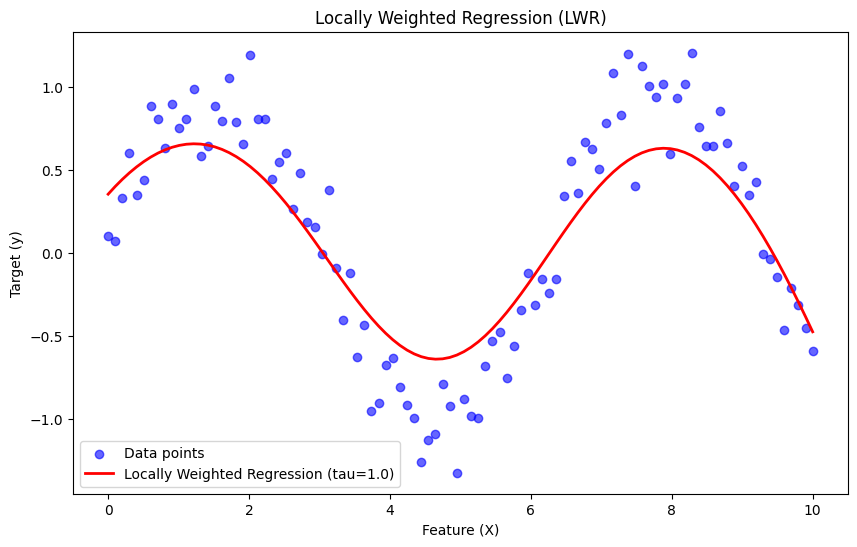

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic dataset
# Generate some data with a known non-linear relationship
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X) + 0.2 * np.random.randn(100, 1)  # Sinusoidal data with noise

# Step 2: Define Locally Weighted Regression (LWR)
def locally_weighted_regression(X, y, tau=0.1):
    """
    Perform Locally Weighted Linear Regression (LWR) for each point in X.

    Arguments:
    X -- Input feature matrix (n_samples x n_features)
    y -- Target values (n_samples)
    tau -- Bandwidth parameter for the Gaussian kernel (controls the weighting)

    Returns:
    y_pred -- Predictions for all data points
    """
    X_bias = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept term
    y_pred = np.zeros(X.shape[0])

    # Loop over each point in X and apply the weighted least squares
    for i in range(X.shape[0]):
        # Compute the weights using a Gaussian kernel
        weights = np.exp(-np.sum((X - X[i])**2, axis=1) / (2 * tau**2))  # Gaussian kernel
        W = np.diag(weights)  # Diagonal weight matrix

        # Compute the weighted least squares solution
        theta = np.linalg.inv(X_bias.T @ W @ X_bias) @ X_bias.T @ W @ y

        # Make prediction for the current data point
        y_pred[i] = X_bias[i] @ theta

    return y_pred

# Step 3: Apply Locally Weighted Regression to the dataset
tau_value = 1.0  # Bandwidth parameter for the Gaussian kernel
y_pred = locally_weighted_regression(X, y, tau=tau_value)

# Step 4: Plot the Results
plt.figure(figsize=(10, 6))

# Scatter plot of the original data
plt.scatter(X, y, color='blue', label='Data points', alpha=0.6)

# Plot the predictions from LWR
plt.plot(X, y_pred, color='red', label=f'Locally Weighted Regression (tau={tau_value})', linewidth=2)

# Title and Labels
plt.title('Locally Weighted Regression (LWR)')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()

# Show the plot
plt.show()